In [1]:
import pandas as pd
pd.set_option("display.max_columns",250)
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yaml as yaml
import openpyxl
import random

sns.set()
# import openmatrix as omx
# import geopandas
# import pyproj
# import re
# import xlrd
from IPython.display import display, HTML

In [2]:
def add_percentage_to_crosstab(ct):
    total_counts = ct['All'][:-1].sum()
    ct['Percent'] = ct.apply(lambda row: round(100 * row['All'] / total_counts, 2), axis=1)
    ct.loc['Percent'] = ct.apply(lambda col: round(100 * col['All'] / total_counts, 2), axis=0)
    ct.loc['Percent', 'Percent'] = pd.NA
    return ct

In [3]:
def make_percentage_bar_plot(variable, title, xlabel, xlabel_rotation):
    grouped_df = obs_df.groupby(variable)["unlinked_weight_scaled"].agg(sum)
    total_weight = grouped_df.sum()
    grouped_df["percent"] = grouped_df/total_weight*100
    plt.figure(figsize=(10,7))
    grouped_df["percent"].plot.bar()
    plt.xlabel(xlabel, fontsize=16)
    plt.xticks(rotation=xlabel_rotation)
    plt.ylabel("Weighted Percent", fontsize=16)
    plt.title(title, fontsize=16)
    plt.show()
    
def make_percentage_bar_plot_cta(variable, title, xlabel, xlabel_rotation):
    grouped_df = cta_df.groupby(variable)["unlinked_weight_scaled"].agg(sum)
    total_weight = grouped_df.sum()
    grouped_df["percent"] = grouped_df/total_weight*100
    plt.figure(figsize=(10,7))
    grouped_df["percent"].plot.bar()
    plt.xlabel(xlabel, fontsize=16)
    plt.xticks(rotation=xlabel_rotation)
    plt.ylabel("Weighted Percent", fontsize=16)
    plt.title(title, fontsize=16)
    plt.show()
    
def make_percentage_bar_plot_metra(variable, title, xlabel, xlabel_rotation):
    grouped_df = metra_df.groupby(variable)["unlinked_weight_scaled"].agg(sum)
    total_weight = grouped_df.sum()
    grouped_df["percent"] = grouped_df/total_weight*100
    plt.figure(figsize=(10,7))
    grouped_df["percent"].plot.bar()
    plt.xlabel(xlabel, fontsize=16)
    plt.xticks(rotation=xlabel_rotation)
    plt.ylabel("Weighted Percent", fontsize=16)
    plt.title(title, fontsize=16)
    plt.show()

In [4]:

with open(r'N:/Projects/CMAP_Activitysim/cmap_abm_lf/survey_data_prep/cmap_inputs.yml') as file:
    settings = yaml.load(file)

metra_path  = os.path.join(settings['data_dir'], 'Metra_2019/2019_Origin-Destination_survey_package/metra_with_autosuff.csv')
cta_path =os.path.join(settings['data_dir'], 'CTA_2017/CTA OD Final Data.xlsx')

survey_hh_path  = os.path.join(settings['data_dir'], settings['cmap_folder'], 'household.csv')
survey_per_path  = os.path.join(settings['data_dir'], settings['cmap_folder'], 'person.csv')
survey_place_path  = os.path.join(settings['data_dir'], settings['cmap_folder'], 'place.csv')
survey_transit_path  = os.path.join(settings['data_dir'], settings['cmap_folder'], 'place_transit.csv')
# survey_weights_path =  os.path.join(settings['popsim_folder'], 'output/final_summary_hh_weights.csv')
survey_trip_weights_path = os.path.join(settings['proj_dir'], 'underreporting_correction/trip_weights.csv')

metra_df = pd.read_csv(metra_path)
cta_df = pd.read_excel(cta_path, sheet_name = 'Data')

survey_hh_df = pd.read_csv(survey_hh_path)
survey_per_df = pd.read_csv(survey_per_path)
survey_place_df = pd.read_csv(survey_place_path)
survey_transit_df = pd.read_csv(survey_transit_path)
survey_trip_weights_df = pd.read_csv(survey_trip_weights_path)
# survey_weights_df = pd.read_csv(survey_weights_path)

output_path = r"output"


C:\Users\leah.flake\AppData\Local\conda\conda\envs\cmap_abm\lib\site-packages\ipykernel_launcher.py:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  
C:\Users\leah.flake\AppData\Local\conda\conda\envs\cmap_abm\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (0,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\leah.flake\AppData\Local\conda\conda\envs\cmap_abm\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (45,50) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\leah.flake\AppData\Local\conda\conda\envs\cmap_abm\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (11,20) have mixed type

In [5]:
survey_transit_df

,sampno,perno,placeno,transitno,latitude,longitude,mode,agency_name,line_name,line_short_name,departure_stop_name,arrival_stop_name,imputed
0,20000300,1,2,1,-9.000000,-9.000000,WALKING,-9,-9,-9,-9,-9,0
1,20000300,1,2,2,41.897683,-87.620054,BUS,Chicago Transit Authority,STREETERVILLE/TAYLOR,157,PEARSON & DEWITT,CLINTON & JACKSON,0
2,20000300,1,2,3,-9.000000,-9.000000,WALKING,-9,-9,-9,-9,-9,0
3,20000300,1,3,1,-9.000000,-9.000000,WALKING,-9,-9,-9,-9,-9,0
4,20000300,1,3,2,41.876999,-87.639435,BUS,Chicago Transit Authority,WATER TOWER EXPRESS,125,VAN BUREN & CANAL,MIES VAN DER ROHE & PEARSON,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33272,70100998,1,6,2,41.842554,-87.724574,BUS,Chicago Transit Authority,PULASKI,53,PULASKI/27TH,PULASKI & 24TH STREET,0
33273,70100998,1,6,3,-9.000000,-9.000000,WALKING,-9,-9,-9,-9,-9,0
33274,70100998,1,7,1,-9.000000,-9.000000,WALKING,-9,-9,-9,-9,-9,0
33275,70100998,1,7,2,41.853792,-87.733284,SUBWAY,Chicago Transit Authority,PINK LINE,PINK,KOSTNER,KEDZIE-DOUGLAS,2


In [6]:
print("Total entries in the CTA on board survey:", len(cta_df))
print("Weighted total of entries in the CTA survey:", cta_df['unlinked_weight'].sum())

print("Total entries in the Metra on board survey:", len(metra_df))
print("Weighted total of entries in the Metra survey:", metra_df['ON_Weight'].sum())

Total entries in the CTA on board survey: 69947
Weighted total of entries in the CTA survey: 1339652.681
Total entries in the Metra on board survey: 56475
Weighted total of entries in the Metra survey: 130000.00000000003


# Transit Onboard Survey Data Coding

## Recode relevant variables to match between each dataset

In [7]:

cta_df_orig = cta_df.copy()
metra_df_orig = metra_df.copy()


In [8]:
cta_df = cta_df_orig[['id', 'route_id', 'direction', 'origin_place_type', 'access_mode', 'egress_mode', 
                     'dest_place_type', 'total_transfers', 'reverse_exact', 'reverse',
                    'hh_employed', 'hh_veh', 'hh_size', 'hh_children', 'employ', 'student',
                    'license', 'age', 'gender', 'income', 'race_1', 'race_2', 'race_3', 'race_4', 
                    'race_5', 'race_6', 'trip_purp','o_zone', 'd_zone', 'TOD','unlinked_weight', 'linked_weight']].copy()

metra_df = metra_df_orig[['Serial_ID', 'Mode_Access_Code', 'Mode_Egress_Code', 
                          'Rail_Line', 'Train_Line',
                         'Transfer_From', 'Transfer_To', 'Origin_Code', 
                          'Destination_Code', 'ON_Weight', 'OFF_Weight',
                         'Gender_Code', 'Age_Code', 'Race_single_field',
                         'HH_People', 'HH_Children', 'HH_Employed', 'HH_Income_Code', 'Time', 'autosuff']].copy()



In [9]:
# Join fields to survey DF for PACE data

# join weights:
survey_df_orig = survey_place_df[['sampno', 'perno', 'placeno', 'tpurp', 'arrtime']] # arrival time to get TOD

survey_trip_weights_df['placeno'] = survey_trip_weights_df['PLANO']
survey_trip_weights_df.drop(['PLANO'], axis = 1, inplace = True)

survey_df_1 = survey_df_orig.merge(survey_trip_weights_df, on = ['sampno', 'perno', 'placeno'], how = 'left')


In [10]:
# join hh info:
workers = survey_per_df[(survey_per_df['wkstat'] == 0 ) | (survey_per_df['emply_ask'] == 1)].groupby(['sampno'])['perno'].count().reset_index(name = 'workers')


survey_hh_df_1 = survey_hh_df.merge(workers, on =['sampno'], how = 'left')
survey_hh_df_1.loc[pd.isna(survey_hh_df_1['workers']), 'workers'] = 0

survey_df_2 = survey_df_1.merge(survey_hh_df_1[['sampno', 'hhsize', 'hhveh', 'workers']], on = ['sampno'], how = 'inner')

survey_df_3 = survey_df_2.merge(survey_per_df[['sampno', 'perno', 'schol']], on = ['sampno', 'perno'], how = 'inner')

survey_df = survey_df_3.copy()

survey_df.workers.value_counts()

2.0    62904
1.0    42494
0.0    10686
3.0     9138
4.0     2485
5.0      415
6.0       54
7.0       53
Name: workers, dtype: int64

In [11]:
# isolate PACE trips and get access/egress
survey_transit_df.agency_name.value_counts()
pace_df = survey_transit_df[survey_transit_df['agency_name'] == 'PACE']
# other_agency_df  = survey_transit_df[(survey_transit_df['agency_name'] != 'PACE') & (survey_transit_df['agency_name'] != '-9')]

survey_df_pace_1 = survey_transit_df.merge(pace_df[['sampno', 'perno', 'placeno', 'agency_name']], on = ['sampno', 'perno', 'placeno'], how = 'inner')

# merged =survey_df_pace_1.merge(other_agency_df[['sampno', 'perno', 'placeno', 'agency_name']], on = ['sampno', 'perno', 'placeno'], how='left', indicator=True)

# survey_df_pace = merged[merged['_merge'] == 'left_only'].copy()

survey_df_pace = survey_df_pace_1.drop_duplicates() # could do the above merge better instead

survey_df_pace['access'] = 0

survey_df_pace.loc[survey_df_pace.transitno == 1, 'access'] = 1

idx = survey_df_pace.groupby(['sampno', 'perno', 'placeno'])['transitno'].transform(max) == survey_df_pace['transitno']

survey_df_pace['egress'] = 0

survey_df_pace.loc[idx, 'egress'] = 1

survey_df_pace.egress.value_counts()
survey_df_pace.access.value_counts()

C:\Users\leah.flake\AppData\Local\conda\conda\envs\cmap_abm\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\leah.flake\AppData\Local\conda\conda\envs\cmap_abm\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\leah.flake\AppData\Local\conda\conda\envs\cmap_abm\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a c

0    2360
1     814
Name: access, dtype: int64

In [12]:
# create one record per pace trip

pace_transit_records = survey_df_pace[(survey_df_pace['access'] == 0) & (survey_df_pace['egress'] == 0) ]
transfers = pace_transit_records.groupby(['sampno', 'perno', 'placeno'])['transitno'].count().reset_index(name = 'transfers')
transfers['transfers'] = transfers['transfers'] - 1
pace_transfers = pace_transit_records[pace_transit_records['agency_name_x'] == 'PACE'].groupby(['sampno', 'perno', 'placeno'])['transitno'].count().reset_index(name = 'transfers')
idx = pace_transit_records.groupby(['sampno', 'perno', 'placeno'])['transitno'].transform(min) == pace_transit_records['transitno']
pace_transit_records = pace_transit_records[idx].copy()


access_records = survey_df_pace[survey_df_pace['access'] == 1][['sampno', 'perno', 'placeno', 'mode']]
egress_records = survey_df_pace[survey_df_pace['egress'] == 1][['sampno', 'perno', 'placeno', 'mode']]

access_records['access_mode'] = access_records['mode']
egress_records['egress_mode'] = egress_records['mode']

pace_transit_records = pace_transit_records.merge(access_records[['sampno', 'perno', 'placeno', 'access_mode']], how = 'inner', on = ['sampno', 'perno', 'placeno'])
pace_transit_records = pace_transit_records.merge(egress_records[['sampno', 'perno', 'placeno', 'egress_mode']], how = 'inner', on = ['sampno', 'perno', 'placeno'])
pace_transit_records = pace_transit_records.merge(pace_transfers, how = 'inner', on = ['sampno', 'perno', 'placeno'])

pace_transit_records
pace_transfers.transfers.value_counts()


1    707
2     96
3      9
4      2
Name: transfers, dtype: int64

In [13]:
# get origin purpose from survey df
survey_df['opurp'] = survey_df.groupby(['sampno', 'perno'])['tpurp'].shift()


# join weights and other info to transit records

pace_df = pace_transit_records.merge(survey_df, on = ['sampno', 'perno', 'placeno'], how = 'inner')

pace_df['unlinked_weight'] = (pace_df['transfers'] + 1) * pace_df['trip_weight']

pace_df['linked_weight'] = pace_df['trip_weight']


pace_df.unlinked_weight.sum()
#pace_df.linked_weight.sum()


309005.3438165491

### Boardings by route


Questions:

In [14]:
cta_route_df = cta_df.groupby(['route_id'])['unlinked_weight'].agg(sum).sort_index(level='route_id').to_frame()
cta_route_df['Percent'] = cta_route_df['unlinked_weight'] / cta_route_df['unlinked_weight'].sum() * 100

# print(route_dict.head())
display(HTML(cta_route_df.to_html()))

,unlinked_weight,Percent
route_id,,
1- Bronzeville/Union Station,1641.155000,0.122506
100- Jeffery Manor Express,646.684000,0.048273
103- West 103rd,2338.208000,0.174538
106- East 103rd,1386.054000,0.103464
108- Halsted/95th,1205.497000,0.089986
11- Lincoln,1950.468000,0.145595
111- 111th/King Drive,3402.060000,0.253951
111A- Pullman Shuttle,175.416000,0.013094
112- Vincennes/111th,2057.344000,0.153573


In [15]:
metra_route_df = metra_df.groupby(['Train_Line'])['ON_Weight'].agg(sum).sort_index(level='Train_Line').to_frame()
metra_route_df['Percent'] = metra_route_df['ON_Weight'] / metra_route_df['ON_Weight'].sum() * 100

# print(route_dict.head())
display(HTML(metra_route_df.to_html()))

,ON_Weight,Percent
Train_Line,,
1,1539.013456,1.183857
3,0.000000,0.000000
4,1449.523812,1.115018
5,10188.196066,7.837074
6,12888.449191,9.914192
8,4343.606983,3.341236
9,1339.817476,1.030629
10,26918.541097,20.706570
11,13764.452599,10.588040


In [16]:
pace_route_df = pace_df.groupby(['line_name'])['trip_weight'].agg(sum).sort_index(level='line_name').to_frame()
pace_route_df['Percent'] = pace_route_df['trip_weight'] / pace_route_df['trip_weight'].sum() * 100

# print(route_dict.head())
display(HTML(pace_route_df.to_html()))

,trip_weight,Percent
line_name,,
159TH STREET,1916.724669,1.347189
55TH/NARRAGANSETT,118.692750,0.083424
63RD,298.967316,0.210132
67TH-69TH-71ST,196.082261,0.137818
69TH-UPS EXPRESS,142.836154,0.100394
87TH,118.691734,0.083424
87TH / 111TH / 127TH,434.650357,0.305498
95TH - RIVER OAKS,1323.730012,0.930397
95TH PARK-N-RIDE EXPRESS-,356.052558,0.250255


In [17]:
def code_purpose_cta(value):
    if (value == 'Work'):
        return 'Work'
    elif (value == 'Home'):
        return 'Home'
    elif (value == 'College / University (students only)'):
        return 'University'
    elif (value == 'Airport (passengers only)'):
        return 'Maintenance'
    elif (value == 'Recreation / Sightseeing / Restaurant'):
        return 'Discretionary'
    elif (value == 'Medical Service / Hospital (non-work)'):
        return 'Maintenance'
    elif (value == 'Social Visit / Church/ Personal'):
        return 'Discretionary'
    elif (value == 'Personal business or errands'):
        return 'Maintenance'
#     elif (value == 10):
#         return 'Escort'
    elif (value == 'Shopping'):
        return 'Maintenance'
#     elif (value == 12):
#         return 'Dine out'
    elif (value == 'School K-12 (students only)'):
        return 'K-12 school'
#     elif (value == 14):
#         return 'Hotel'
#     elif (value == 15):
#         return 'Sporting event'
    elif (value == 'Other'):
        return 'Maintenance'


def code_purpose_metra(value):
    if (value == 2):
        return 'Work'
    elif (value == 1):
        return 'Home'
    elif (value == 5):
        return 'University'
    elif (value == 6):
        return 'University'
    elif (value == 4):
        return 'K-12 school'
#     elif (value == 14):
#         return 'Hotel'
#     elif (value == 15):
#         return 'Sporting event'
    elif (value == 3):
        return 'Maintenance'
    elif (value == 8):
        return 'Maintenance'
    else:
        return 'Maintenance'

def code_purpose_pace(value):
    if ((value == 1) or (value == 2)):
        return 'Home'
    elif(value == 3 or value == 4):
        return 'Work'
    elif(value == 5):
        return 'Maintenance'
    elif (value == 6):
        return 'University' # separate into k12/uni later
    elif(value in [7, 8, 9, 10, 11, 12, 13, 15, 26, 27, 28, 97]):
        return 'Maintenance'
    else:
        return 'Discretionary'




In [18]:
cta_df['ORIG_PURPOSE'] = cta_df['origin_place_type'].apply(lambda value: code_purpose_cta(value))

cta_df['DEST_PURPOSE'] = cta_df['dest_place_type'].apply(lambda value: code_purpose_cta(value))

metra_df['ORIG_PURPOSE'] = metra_df['Origin_Code'].apply(lambda value: code_purpose_metra(value))

metra_df['DEST_PURPOSE'] = metra_df['Destination_Code'].apply(lambda value: code_purpose_metra(value))

metra_df['ORIG_PURPOSE'] = metra_df['Origin_Code'].apply(lambda value: code_purpose_metra(value))

metra_df['DEST_PURPOSE'] = metra_df['Destination_Code'].apply(lambda value: code_purpose_metra(value))

pace_df['DEST_PURPOSE'] = pace_df['tpurp'].apply(lambda value: code_purpose_pace(value))

pace_df['ORIG_PURPOSE'] = pace_df['opurp'].apply(lambda value: code_purpose_pace(value))

pace_df.loc[(pace_df['DEST_PURPOSE'] == 'University') & (pace_df['schol'] > 0 ) & (pace_df['schol'] <= 4 ), 'DEST_PURPOSE'] = 'K-12 school'

pace_df.loc[(pace_df['ORIG_PURPOSE'] == 'University') &  (pace_df['schol'] > 0 ) & (pace_df['schol'] <= 5 ), 'ORIG_PURPOSE'] = 'K-12 school'                                                     

In [19]:
pace_df.tpurp.value_counts().sort_index()

-8       1
 1     313
 2       2
 3     217
 4       7
 5      10
 6      54
 7       1
 8       7
 9      48
 10      2
 11      2
 12     24
 13      1
 14      1
 15     24
 16      7
 17     20
 18      9
 19     11
 20      1
 21      2
 23      7
 24      9
 25      2
 26     18
 27      2
 28     12
Name: tpurp, dtype: int64

In [20]:
print(cta_df['ORIG_PURPOSE'].value_counts())
print(cta_df['DEST_PURPOSE'].value_counts())
print(metra_df['ORIG_PURPOSE'].value_counts())
print(metra_df['DEST_PURPOSE'].value_counts())
print(pace_df['ORIG_PURPOSE'].value_counts())
print(pace_df['DEST_PURPOSE'].value_counts())
print(pace_df[pace_df['ORIG_PURPOSE'] == 'K-12 school'][['schol', 'perno']])


Home             32787
Work             19205
Maintenance       7040
Discretionary     6448
University        3263
K-12 school       1204
Name: ORIG_PURPOSE, dtype: int64
Home             27878
Work             19926
Discretionary     9262
Maintenance       8688
University        3254
K-12 school        939
Name: DEST_PURPOSE, dtype: int64
Home           51820
Maintenance     2631
Work            1739
University       178
K-12 school      107
Name: ORIG_PURPOSE, dtype: int64
Work           49724
Maintenance     4554
University      1126
Home             803
K-12 school      268
Name: DEST_PURPOSE, dtype: int64
Home             297
Work             260
Maintenance      142
Discretionary     69
University        24
K-12 school       22
Name: ORIG_PURPOSE, dtype: int64
Home             315
Work             224
Maintenance      151
Discretionary     70
K-12 school       31
University        23
Name: DEST_PURPOSE, dtype: int64
     schol  perno
95       4      2
107      4      3
148      4

### Access mode

* 1 - PNR (driving, carshare)
* 2 - KNR (dropped off, taxi/TNC)
* 3 - Walk (includes bike, scooter, skateboard)

Questions:
* Should taxi be TNC?


In [21]:
pace_df.access_mode.value_counts()

WALKING                              669
PARK AND RIDE                         76
PRIVATE SHUTTLE OR SOMETHING ELSE     36
KISS AND RIDE                         24
BICYCLING                              8
TAXI / UBER / LYFT                     1
Name: access_mode, dtype: int64

In [22]:
# Code access/egress before imputation

def code_access_mode_cta(value):
    if (value in  ['Was dropped off by friend/family in a car', 'Biked on own bike', 
                   'Taxi', 'Divvy bike share', 'Was picked up by friend/family in a car']):
        return 'KNR'
    elif (value == 'Uber, Lyft, etc.'):
        return 'TNR'
    elif (value in ['Drove alone and parked', 'Carpool/vanpool', 'Got in a parked vehicle and drove alone']):
        return 'PNR'
    return 'Walk'


def code_access_mode_metra(value):
    if (value in  [3, 10, 12, 13, 14]):
        return 'KNR'
    if (value == 11):
        return 'TNR'
    elif (value in [2, 4, 5]):
        return 'PNR'
    return 'Walk'


def code_egress_mode_metra(value):
    if (value in  [10, 6, 8, 9]):
        return 'KNR'
    if (value == 7):
        return 'TNR'
    elif (value in [11, 12, 13]):
        return 'PNR'
    return 'Walk'

def code_access_mode_pace(value):
    if (value == 'PARK AND RIDE'):
        return 'PNR'
    elif (value in ['PRIVATE SHUTTLE OR SOMETHING ELSE', 'BICYCLE', 'KISS AND RIDE']):
        return 'KNR'
    return 'Walk'

cta_df['access_mode_survey'] = cta_df['access_mode']
cta_df['egress_mode_survey'] = cta_df['egress_mode']
cta_df['access_mode'] = cta_df['access_mode_survey'].apply(lambda value: code_access_mode_cta(value))
cta_df['egress_mode'] = cta_df['egress_mode_survey'].apply(lambda value: code_access_mode_cta(value))

metra_df['access_mode'] = metra_df['Mode_Access_Code'].apply(lambda value: code_access_mode_metra(value))
metra_df['egress_mode'] = metra_df['Mode_Egress_Code'].apply(lambda value: code_egress_mode_metra(value))


pace_df['access_mode_survey'] = pace_df['access_mode']
pace_df['egress_mode_survey'] = pace_df['egress_mode']

pace_df['access_mode'] = pace_df['access_mode_survey'].apply(lambda value: code_access_mode_pace(value))
pace_df['egress_mode'] = pace_df['egress_mode_survey'].apply(lambda value: code_access_mode_pace(value))


In [23]:
orig_dest_ct = pd.crosstab(cta_df['access_mode'], cta_df['egress_mode'], values=cta_df['unlinked_weight'], aggfunc=sum, margins=True)
orig_dest_ct = add_percentage_to_crosstab(orig_dest_ct)
orig_dest_ct.fillna(0, inplace=True)
orig_dest_ct.applymap(lambda x: round(x,2))


egress_mode,KNR,PNR,TNR,Walk,All,Percent
access_mode,,,,,,
KNR,5220.36,505.39,488.19,36990.42,43204.36,3.23
PNR,647.23,2067.78,157.02,36108.12,38980.14,2.91
TNR,493.94,98.08,713.99,7224.59,8530.60,0.64
Walk,23945.49,16683.32,6731.49,1201577.29,1248937.59,93.23
All,30307.01,19354.57,8090.69,1281900.40,1339652.68,100.00
Percent,2.26,1.44,0.60,95.69,100.00,0.00


In [24]:
orig_dest_ct = pd.crosstab(metra_df['access_mode'], metra_df['egress_mode'], values=metra_df['ON_Weight'], aggfunc=sum, margins=True)
orig_dest_ct = add_percentage_to_crosstab(orig_dest_ct)
orig_dest_ct.fillna(0, inplace=True)
orig_dest_ct.applymap(lambda x: round(x,2))


egress_mode,KNR,PNR,TNR,Walk,All,Percent
access_mode,,,,,,
KNR,1404.33,178.90,408.21,17904.53,19895.97,15.30
PNR,1493.45,666.64,388.66,68026.58,70575.33,54.29
TNR,179.77,34.58,210.82,852.43,1277.61,0.98
Walk,1171.51,795.70,484.21,35799.67,38251.09,29.42
All,4249.06,1675.82,1491.91,122583.21,130000.00,100.00
Percent,3.27,1.29,1.15,94.29,100.00,0.00


In [25]:
orig_dest_ct = pd.crosstab(pace_df['access_mode'], pace_df['egress_mode'], values=pace_df['trip_weight'], aggfunc=sum, margins=True)

orig_dest_ct = add_percentage_to_crosstab(orig_dest_ct)
orig_dest_ct.fillna(0, inplace=True)
orig_dest_ct.applymap(lambda x: round(x,2))



egress_mode,KNR,PNR,Walk,All,Percent
access_mode,,,,,
KNR,1740.00,1120.53,4365.90,7226.43,5.08
PNR,611.73,454.05,6726.47,7792.26,5.48
Walk,2715.88,7219.71,117321.56,127257.15,89.44
All,5067.61,8794.29,128413.93,142275.83,100.00
Percent,3.56,6.18,90.26,100.00,0.00


### Auto Sufficiency
* 0 for households with no autos
* 1 for households that have 0 < autos < number of workers
* 2 for households that have 0 < autos >= number of workers

Questions:
* Auto suff for Metra was imputed in R based on CMAP data
  * Mainly resulted in auto suff "vehicles greater than or equal to workers"
  * Does that make sense for commuter rail?
* Some missing hh employed or hh veh in CTA

In [26]:
cta_df['auto_suff'] = -1

cta_df['hh_veh_survey'] = cta_df.hh_veh
cta_df['hh_employed_survey'] = cta_df.hh_employed


In [27]:

cta_df.loc[cta_df.hh_veh_survey == 'None','hh_veh'] = 0
cta_df.loc[cta_df.hh_veh_survey == '10 or more','hh_veh'] = 10
cta_df['hh_veh'] = pd.to_numeric(cta_df['hh_veh'])
cta_df.loc[cta_df.hh_employed_survey == 'None','hh_employed'] = 0
cta_df.loc[cta_df.hh_employed_survey == '10 or more','hh_employed'] = 10
cta_df['hh_employed'] = pd.to_numeric(cta_df['hh_employed'])
cta_df.loc[cta_df.hh_veh < cta_df.hh_employed, 'auto_suff'] = 1
cta_df.loc[cta_df.hh_veh >= cta_df.hh_employed, 'auto_suff'] = 2
cta_df.loc[cta_df.hh_veh == 0, 'auto_suff'] = 0

metra_df['auto_suff'] = metra_df['autosuff']

In [28]:
print(cta_df['auto_suff'].value_counts(normalize = True))
print(cta_df[cta_df['auto_suff'] >=0]['auto_suff'].value_counts(normalize = True))
print(cta_df['hh_veh'].value_counts())
print(cta_df['hh_employed'].value_counts())



# cta_df.loc[cta_df.auto_suff <0]

 2    0.445423
 0    0.294266
 1    0.259925
-1    0.000386
Name: auto_suff, dtype: float64
2    0.445595
0    0.294379
1    0.260026
Name: auto_suff, dtype: float64
1.0     27548
0.0     20583
2.0     15364
3.0      4475
4.0      1443
5.0       325
6.0       117
7.0        25
8.0        24
10.0       24
9.0         4
Name: hh_veh, dtype: int64
2.0     27367
1.0     25252
3.0      7749
0.0      5911
4.0      2649
5.0       684
6.0       168
10.0       53
7.0        50
8.0        34
9.0         9
Name: hh_employed, dtype: int64


In [29]:
# impute CTA autosuff based on overall distribution

# 0    0.294379
# 1    0.260026
# 2    0.445595
random.seed(413)

m = cta_df[cta_df['auto_suff']<0].shape[0]

s = np.random.choice([0, 1, 2],
                     p=[0.294379, 0.260026, 0.445595], 
                     size = m)
print(s)

cta_df.loc[cta_df['auto_suff'] < 0, 'auto_suff'] = s

[2 0 1 1 0 2 2 0 0 2 1 1 0 1 1 1 0 0 1 0 1 1 1 1 2 2 1]


In [30]:
pace_df.loc[pace_df.hhveh < pace_df.workers, 'auto_suff'] = 1
pace_df.loc[pace_df.hhveh >= pace_df.workers, 'auto_suff'] = 2
pace_df.loc[pace_df.hhveh == 0, 'auto_suff'] = 0


In [31]:
pace_df.auto_suff.value_counts()

2.0    499
0.0    209
1.0    106
Name: auto_suff, dtype: int64

In [32]:
metra_df['unlinked_weight'] = metra_df['ON_Weight']
metra_df['study'] = 'metra'
cta_df['study'] = 'cta'
pace_df['study'] = 'pace'

In [33]:
# metra_df['linked_weight']


metra_df['num_transfers'] = 0
metra_df.loc[(metra_df.Transfer_From.notnull()) | (metra_df.Mode_Access_Code == 9), 'num_transfers'] = 1 
metra_df.loc[(metra_df.Transfer_To.notnull()) | (metra_df.Mode_Egress_Code == 14), 'num_transfers'] = 1 + metra_df['num_transfers']

print(metra_df.num_transfers.value_counts())

metra_df['linked_weight'] = metra_df['unlinked_weight']/(metra_df['num_transfers'] + 1)

0    56119
1      354
2        2
Name: num_transfers, dtype: int64


In [34]:
print(pace_df.trip_weight.sum())


142275.83082637293


In [35]:
# Scale to boardings in oct 2018
pd.set_option('display.max_rows', 130)

metra_boardings = 267772 # close to 130,000 * 2
cta_bus_boardings = 845343
cta_rail_boardings = 485943
pace_boardings = 102852

print(metra_df.unlinked_weight.sum())
print(cta_df.unlinked_weight.sum())
print(pace_df.unlinked_weight.sum())
# print(cta_df.route_id.value_counts())

print(cta_df[cta_df.route_id.str.contains('Line')].unlinked_weight.sum())
print(cta_df[~(cta_df.route_id.str.contains('Line'))].unlinked_weight.sum())


cta_df.loc[cta_df.route_id.str.contains('Line'), 'unlinked_weight_scaled'] = cta_df.loc[cta_df.route_id.str.contains('Line'), 'unlinked_weight'] * 485943/571173.0 
cta_df.loc[~cta_df.route_id.str.contains('Line'), 'unlinked_weight_scaled'] = cta_df.loc[~cta_df.route_id.str.contains('Line'), 'unlinked_weight'] * 845343/768479.6810000001
metra_df['unlinked_weight_scaled']  = metra_df['unlinked_weight'] * (267772/2)/130000.00000000003
pace_df['unlinked_weight_scaled']  = pace_df['unlinked_weight'] * (102852)/pace_df.unlinked_weight.sum()

print('scaled weights')
print(metra_df.unlinked_weight_scaled.sum())
print(cta_df.unlinked_weight_scaled.sum())
print(pace_df.unlinked_weight_scaled.sum())
# print(cta_df.route_id.value_counts())

print(cta_df[cta_df.route_id.str.contains('Line')].unlinked_weight_scaled.sum())
print(cta_df[~(cta_df.route_id.str.contains('Line'))].unlinked_weight_scaled.sum())

cta_df['total_transfers_updated'] = cta_df['total_transfers']
cta_df.loc[cta_df.total_transfers == 'None', 'total_transfers_updated'] = 0
cta_df['total_transfers_updated'] = pd.to_numeric(cta_df['total_transfers_updated'])
cta_df['linked_weight_scaled'] = cta_df['unlinked_weight_scaled']/(cta_df['total_transfers_updated'] +1)
metra_df['linked_weight_scaled'] = metra_df['unlinked_weight_scaled']/(metra_df['num_transfers'] +1)
pace_df['linked_weight_scaled'] = pace_df['unlinked_weight_scaled']/(pace_df['transfers'] +1)


130000.00000000003
1339652.681
309005.3438165491
571173.0
768479.6810000001
scaled weights
133886.0
1331286.0
102852.0
485943.0
845342.9999999998


#### Impute tour purposes for non-work tours:

Impute work tours/sub-tours and joint tour purposes where applicable using time of day.

* Impute work tours from maintenance/discretionary tours 
* Impute work sub-tours where neither end is home
* Impute joint tours from maintenance/discretionary tours that remain

Metra is only first half of the day, so have to do it on regular metra dataset before combining



In [36]:
cta_df.TOD.value_counts()
# metra_df.Time.value_counts()

3:01 pm - 7:00 pm     24660
9:01 am - 3:00 pm     17449
6:01 am - 9:00 am     15937
7:01 pm - 10:00 pm     9627
10:01 pm - 3:30 am     1850
3:31 am - 6:00 am       424
Name: TOD, dtype: int64

In [37]:
# derive survey TOD

metra_df['surveyed_hour'] = metra_df['Time'].str.split(':').str[0]
metra_df['surveyed_hour'] = pd.to_numeric(metra_df['surveyed_hour'], errors = 'coerce')
metra_df['TOD'] = ''
metra_df.loc[(metra_df.surveyed_hour >= 9) & (metra_df.surveyed_hour <15), 'TOD'] = '9:01 am - 3:00 pm'
metra_df.loc[(metra_df.surveyed_hour >= 15) & (metra_df.surveyed_hour <19),'TOD'] = '3:01 pm - 7:00 pm'
metra_df.loc[(metra_df.surveyed_hour >= 19) & (metra_df.surveyed_hour <22),'TOD'] = '7:01 pm - 10:00 pm'
metra_df.loc[(metra_df.surveyed_hour >= 6) & (metra_df.surveyed_hour <9),'TOD'] = '6:01 am - 9:00 am'
metra_df.loc[(metra_df.surveyed_hour <3) | (metra_df.surveyed_hour >20),'TOD'] = '10:01 pm - 3:30 am'
metra_df.loc[(metra_df.surveyed_hour >=3) & (metra_df.surveyed_hour <6),'TOD'] = '3:31 am - 6:00 am'

metra_df[metra_df.TOD != ''].TOD.value_counts(normalize = True)


6:01 am - 9:00 am     0.850471
3:31 am - 6:00 am     0.085766
9:01 am - 3:00 pm     0.061830
3:01 pm - 7:00 pm     0.000803
7:01 pm - 10:00 pm    0.000712
10:01 pm - 3:30 am    0.000420
Name: TOD, dtype: float64

In [38]:
# impute TOD where missing


m = metra_df[metra_df.TOD == ''].shape[0]

s = np.random.choice(['3:31 am - 6:00 am', '6:01 am - 9:00 am', '9:01 am - 3:00 pm', '3:01 pm - 7:00 pm',  
                      '7:01 pm - 10:00 pm', '10:01 pm - 3:30 am'],
                     p=[0.085766, 0.850471,  0.061830, 0.000803, 0.00071,  0.000420], 
                     size = m)
print(s)
len(s)

metra_df.loc[metra_df.TOD == '', 'TOD'] = s

metra_df.TOD.value_counts(normalize = True)


['6:01 am - 9:00 am' '9:01 am - 3:00 pm' '6:01 am - 9:00 am' ...
 '6:01 am - 9:00 am' '6:01 am - 9:00 am' '6:01 am - 9:00 am']


6:01 am - 9:00 am     0.850907
3:31 am - 6:00 am     0.085525
9:01 am - 3:00 pm     0.061585
3:01 pm - 7:00 pm     0.000815
7:01 pm - 10:00 pm    0.000744
10:01 pm - 3:30 am    0.000425
Name: TOD, dtype: float64

In [39]:
# derive pace TOD
pace_df['arrtime_dt'] = pd.to_datetime(pace_df['arrtime'], errors='coerce')

pace_df['arr_hour'] = pace_df['arrtime_dt'].dt.hour

pace_df['TOD'] = ''
pace_df.loc[(pace_df.arr_hour >= 9) & (pace_df.arr_hour <15), 'TOD'] = '9:01 am - 3:00 pm'
pace_df.loc[(pace_df.arr_hour >= 15) & (pace_df.arr_hour <19),'TOD'] = '3:01 pm - 7:00 pm'
pace_df.loc[(pace_df.arr_hour >= 19) & (pace_df.arr_hour <22),'TOD'] = '7:01 pm - 10:00 pm'
pace_df.loc[(pace_df.arr_hour >= 6) & (pace_df.arr_hour <9),'TOD'] = '6:01 am - 9:00 am'
pace_df.loc[(pace_df.arr_hour <3) | (pace_df.arr_hour >20),'TOD'] = '10:01 pm - 3:30 am'
pace_df.loc[(pace_df.arr_hour >=3) & (pace_df.arr_hour <6),'TOD'] = '3:31 am - 6:00 am'

pace_df[pace_df.TOD != ''].TOD.value_counts(normalize = True)
# pace_df.arr_hour.value_counts()

3:01 pm - 7:00 pm     0.348894
6:01 am - 9:00 am     0.298526
9:01 am - 3:00 pm     0.256757
7:01 pm - 10:00 pm    0.070025
10:01 pm - 3:30 am    0.020885
3:31 am - 6:00 am     0.004914
Name: TOD, dtype: float64

In [40]:
pace_df['hh_size'] = pace_df['hhsize']

In [41]:
# combine first half metra with CTA, pace

obs_df = pd.concat([cta_df, metra_df, pace_df])

# obs_df[pd.isnull(obs_df.HH_Employed)].shape[0]

### Tour Purpose

* Work (home-based-work or work-based tour)
* School
* Other - use a hierarchy


In [42]:
purpose_ct = pd.crosstab(
    obs_df['ORIG_PURPOSE'],
    obs_df['DEST_PURPOSE'],
    values=obs_df['unlinked_weight_scaled'],
    aggfunc=sum,
    normalize='all',
    margins=True)*100
# purpose_ct = add_percentage_to_crosstab(purpose_ct)
# purpose_ct.fillna(0, inplace=True)
purpose_ct.applymap(lambda x: round(x,2))

DEST_PURPOSE,Discretionary,Home,K-12 school,Maintenance,University,Work,All
ORIG_PURPOSE,,,,,,,
Discretionary,0.90,2.80,0.01,0.62,0.06,0.42,4.82
Home,6.62,0.43,1.95,8.54,3.37,34.01,54.91
K-12 school,0.11,2.43,0.22,0.11,0.03,0.10,2.99
Maintenance,0.95,5.95,0.04,2.02,0.12,0.82,9.90
University,0.51,2.43,0.00,0.41,0.44,0.25,4.05
Work,1.62,17.99,0.05,1.84,0.18,1.64,23.32
All,10.71,32.03,2.28,13.54,4.20,37.24,100.00


In [43]:
def determine_tour_purpose(orig_purpose, dest_purpose):
    if (orig_purpose == 'Work') & (dest_purpose == 'Work'):
        return 'Work sub-tour'
    if (orig_purpose == 'Work') | (dest_purpose == 'Work'):
        return 'Work'
    if (orig_purpose == 'Other work') | (dest_purpose == 'Other work'):
        return 'Maintenance'
    if (orig_purpose == 'University') | (dest_purpose == 'University'):
        return 'University'
    if (orig_purpose == 'K-12 school') | (dest_purpose == 'K-12 school'):
        return 'School'
    if (orig_purpose == 'Maintenance') | (dest_purpose == 'Maintenance'):
        return 'Maintenance'
    if (orig_purpose == 'Discretionary') | (dest_purpose == 'Discretionary'):
        return 'Discretionary'
    if (orig_purpose == 'Home') & (dest_purpose != 'Home'):
        return dest_purpose
    if (orig_purpose != 'Home') & (dest_purpose == 'Home'):
        return orig_purpose
    if (orig_purpose == 'Home') & (dest_purpose == 'Home'):
        return 'Discretionary'
    if orig_purpose == dest_purpose:
        return orig_purpose
    return dest_purpose

obs_df['TOUR_PURPOSE'] = obs_df.apply(lambda row: determine_tour_purpose(row['ORIG_PURPOSE'], row['DEST_PURPOSE']), axis=1)

# home-home as other discrectionary
# Social/visiting vs. other discretionary
# Recreation & sporting in "other discretionary"


In [44]:
# use trip weights instead
obs_df['TOUR_PURPOSE'].value_counts(dropna=False)
obs_df.groupby(['TOUR_PURPOSE'])['linked_weight_scaled'].agg(sum).sort_index(level='TOUR_PURPOSE')


TOUR_PURPOSE
Discretionary    125074.222136
Maintenance      199007.825406
School            52035.567753
University        84195.383800
Work             685065.268628
Work sub-tour     19540.749073
Name: linked_weight_scaled, dtype: float64

In [45]:
obs_df.groupby(['TOUR_PURPOSE','study'])['unlinked_weight'].agg(sum).sort_index(level='TOUR_PURPOSE')

TOUR_PURPOSE   study
Discretionary  cta      159582.462888
               metra       441.762296
               pace      32336.667319
Maintenance    cta      226323.378862
               metra     10058.681432
               pace     131514.222052
School         cta       64968.843944
               metra       676.047777
               pace      19735.941252
University     cta      109550.591775
               metra      2701.046287
               pace      10620.810409
Work           cta      759064.915575
               metra    113192.210039
               pace     105735.667377
Work sub-tour  cta       20162.487956
               metra      2930.252169
               pace       9062.035406
Name: unlinked_weight, dtype: float64

In [46]:
# access/egress individually coded earlier
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# code access based on both access/egress
def determine_tour_mode(row):
    if (row['access_mode'] == 'PNR') | (row['egress_mode'] == 'PNR'):
        return 'PNR'
    if (row['access_mode'] == 'TNR') | (row['egress_mode'] == 'TNR'):
        return 'TNR'
    if (row['access_mode'] == 'KNR') | (row['egress_mode'] == 'KNR'):
        return 'KNR'
    return 'Walk'

obs_df['TOUR_MODE'] = obs_df.apply(lambda row: determine_tour_mode(row), axis=1)
access_df = obs_df.groupby(['TOUR_MODE'])['unlinked_weight_scaled'].agg(sum).sort_index(level='TOUR_MODE').to_frame()
access_df['Percent'] = access_df['unlinked_weight_scaled'] / access_df['unlinked_weight_scaled'].sum() * 100



print(access_df)

obs_df.groupby(['TOUR_MODE','study'])['unlinked_weight_scaled'].agg(sum).sort_index(level='TOUR_MODE')

           unlinked_weight_scaled  Percent
TOUR_MODE                                 
KNR                     91100.328    5.810
PNR                    135780.222    8.659
TNR                     17304.447    1.104
Walk                  1323839.003   84.427


TOUR_MODE  study
KNR        cta       63343.484
           metra     21092.576
           pace       6664.267
PNR        cta       50725.536
           metra     73724.333
           pace      11330.354
TNR        cta       15105.162
           metra      2199.285
Walk       cta     1202111.817
           metra     36869.806
           pace      84857.379
Name: unlinked_weight_scaled, dtype: float64

In [47]:
# Impute work tour purpose
# Limit to workers, tour purpose is maintenance/discretionary
# limit to weekdays? need to ask -- Day_Type_2 == 1

obs_df['TOUR_PURPOSE_INIT'] = obs_df['TOUR_PURPOSE']
obs_df['imputed_tour_purpose'] = ''

# calculate utility work tour based on model coefficients
obs_df['uWTP'] = -0.169

# original tour purpose
obs_df.loc[(obs_df['TOUR_PURPOSE_INIT'] == 'Discretionary'), 'uWTP'] = obs_df[obs_df['TOUR_PURPOSE_INIT'] == 'Discretionary']['uWTP'] + (-0.961)


# surveyed hour
obs_df.loc[(obs_df['TOD'] == '9:01 am - 3:00 pm'), 'uWTP'] = obs_df[(obs_df['TOD'] == '9:01 am - 3:00 pm')]['uWTP'] + (-1.38)
obs_df.loc[(obs_df['TOD'] == '3:01 pm - 7:00 pm'), 'uWTP'] = obs_df[(obs_df['TOD'] == '3:01 pm - 7:00 pm')]['uWTP'] + (-0.286)
obs_df.loc[(obs_df['TOD'] == '7:01 pm - 10:00 pm'), 'uWTP'] = obs_df[(obs_df['TOD'] == '7:01 pm - 10:00 pm')]['uWTP'] + (-0.909)

# access mode
obs_df.loc[(obs_df['TOUR_MODE'] == 'PNR'), 'uWTP'] = obs_df[(obs_df['TOUR_MODE'] == 'PNR')]['uWTP'] + (2.08) 
obs_df.loc[(obs_df['TOUR_MODE'] == 'KNR') | (obs_df['TOUR_MODE'] == 'TNR'), 'uWTP'] = obs_df[(obs_df['TOUR_MODE'] == 'KNR') | (obs_df['TOUR_MODE'] == 'TNR')]['uWTP'] + (0.952) 

# calculate probability
obs_df['expuWTP'] = np.exp(obs_df['uWTP'])
obs_df['probWTP'] = obs_df['expuWTP']/(1 + obs_df['expuWTP'])

print(obs_df['probWTP'].value_counts(dropna=False))

# Generate random number
np.random.seed(30)
obs_df['randn'] = np.random.uniform(0, 1, obs_df.shape[0])

obs_df.loc[(obs_df['randn'] < obs_df['probWTP']), 'imputed_tour_purpose'] = 'Work'
obs_df.loc[(obs_df['randn'] >= obs_df['probWTP']), 'imputed_tour_purpose'] = 'replace'


print(np.mean(obs_df['probWTP']))
print(obs_df[obs_df['imputed_tour_purpose'] == 'Work'].shape[0]/
      (obs_df[obs_df['imputed_tour_purpose'] == 'Work'].shape[0] + 
       obs_df[obs_df['imputed_tour_purpose'] == 'replace'].shape[0]))

obs_df.loc[((obs_df['HH_Employed'] > 0) |(obs_df['hh_employed'] > 0)) & 
           (obs_df['imputed_tour_purpose'] == 'Work') & 
           (obs_df['TOUR_PURPOSE_INIT'].isin(['Maintenance', 'Discretionary'])), 'TOUR_PURPOSE'] = obs_df[((obs_df['HH_Employed'] > 0) |(obs_df['hh_employed'] > 0)) & 
               (obs_df['imputed_tour_purpose'] == 'Work') & 
               (obs_df['TOUR_PURPOSE_INIT'].isin(['Maintenance', 'Discretionary']))]['imputed_tour_purpose']

obs_df.groupby(['TOUR_PURPOSE'])['linked_weight'].agg(sum).sort_index(level='TOUR_PURPOSE')



0.871    31792
0.458    28205
0.388    18880
0.175    13867
0.686     9889
0.254     5679
0.195     2989
0.115     2860
0.075     2759
0.630     2204
0.355     1679
0.835     1245
0.622     1226
0.244     1100
0.469      398
0.394      394
0.660      390
0.731      305
0.510      265
0.386      260
0.721      257
0.174      233
0.252      219
0.456      141
Name: probWTP, dtype: int64
0.5122363750712877
0.51317237259895


TOUR_PURPOSE
Discretionary   118900.150
Maintenance     193689.362
School           55451.787
University       88386.466
Work            794308.548
Work sub-tour    22852.947
Name: linked_weight, dtype: float64

In [48]:
# Derive observed/surveyed hour (as a sub for departure hour)


# # pd.to_datetime(obs_df['StartTime']).head()
# obs_df['surveyed_hour'] = pd.to_datetime(obs_df['StartTime']).dt.hour

# obs_df['surveyed_hour'].value_counts(dropna=False).sort_index(level='surveyed_hour')


In [49]:
# Impute work sub-tour purpose
# Limit to origin/destination not home

# calculate utility work subtour based on model coefficients
obs_df['uWST'] = -7.38

obs_df.loc[(obs_df['ORIG_PURPOSE'] == 'Work') | (obs_df['DEST_PURPOSE'] == 'Work'), 'uWST'] = \
    obs_df[(obs_df['ORIG_PURPOSE'] == 'Work') | (obs_df['DEST_PURPOSE'] == 'Work')]['uWST'] + (3.93)
obs_df.loc[(obs_df['TOD'] == '9:01 am - 3:00 pm'), 'uWST'] = obs_df[(obs_df['TOD'] == '9:01 am - 3:00 pm')]['uWST'] + (3.14)



# calculate probability
obs_df['expuWST'] = np.exp(obs_df['uWST'])
obs_df['probWST'] = obs_df['expuWST']/(1 + obs_df['expuWST'])

print(obs_df['probWST'].value_counts(dropna=False))

# Generate random number
obs_df['randn'] = np.random.uniform(0, 1, obs_df.shape[0])

obs_df.loc[(obs_df['randn'] < obs_df['probWST']), 'imputed_tour_purpose'] = 'Work sub-tour'
obs_df.loc[(obs_df['randn'] >= obs_df['probWST']), 'imputed_tour_purpose'] = 'replace'


print(np.mean(obs_df['probWST']))
print(obs_df[obs_df['imputed_tour_purpose'] == 'Work sub-tour'].shape[0]/
      (obs_df[obs_df['imputed_tour_purpose'] == 'Work sub-tour'].shape[0] + 
       obs_df[obs_df['imputed_tour_purpose'] == 'replace'].shape[0]))

obs_df.loc[(obs_df['imputed_tour_purpose'] == 'Work sub-tour') & 
           (obs_df['ORIG_PURPOSE'] != 'Home') & 
           (obs_df['DEST_PURPOSE'] != 'Home'), 'TOUR_PURPOSE'] = obs_df[(obs_df['imputed_tour_purpose'] == 'Work sub-tour') & 
           (obs_df['ORIG_PURPOSE'] != 'Home') & 
           (obs_df['DEST_PURPOSE'] != 'Home')]['imputed_tour_purpose']

obs_df.groupby(['TOUR_PURPOSE'])['linked_weight'].agg(sum).sort_index(level='TOUR_PURPOSE')



0.031    80729
0.001    25371
0.014    13049
0.423     8087
Name: probWST, dtype: int64
0.04799596105836908
0.04765946744632022


TOUR_PURPOSE
Discretionary   118859.822
Maintenance     193600.232
School           55427.541
University       88327.044
Work            783517.766
Work sub-tour    33856.856
Name: linked_weight, dtype: float64

In [50]:

obs_df.hh_size.value_counts()

obs_df.loc[obs_df.hh_size == '10 or more', 'hh_size'] = 10
obs_df.hh_size = pd.to_numeric(obs_df.hh_size)

In [51]:
# Impute joint tour
# Limit to hhsize >1 and maintenance/discretionary tour purpose (after prev steps)

# calculate utility fully joint tour based on model coefficients
obs_df['uFJT'] = -3.33 

# surveyed hour
obs_df.loc[(obs_df['TOD'] == '9:01 am - 3:00 pm'), 'uFJT'] = obs_df[(obs_df['TOD'] == '9:01 am - 3:00 pm')]['uFJT'] + (0.649)
obs_df.loc[(obs_df['TOD'] == '3:01 pm - 7:00 pm'), 'uFJT'] = obs_df[(obs_df['TOD'] == '3:01 pm - 7:00 pm')]['uFJT'] + (0.957)
obs_df.loc[(obs_df['TOD'] == '7:01 pm - 10:00 pm'), 'uFJT'] = obs_df[(obs_df['TOD'] == '7:01 pm - 10:00 pm')]['uFJT'] + (1.62)

obs_df.loc[(obs_df['TOUR_PURPOSE_INIT'] == 'Discretionary'), 'uFJT'] = obs_df[(obs_df['TOUR_PURPOSE_INIT'] == 'Discretionary')]['uFJT'] + (0.687)
obs_df.loc[(obs_df['TOUR_PURPOSE_INIT'] == 'Maintenance'), 'uFJT'] = obs_df[(obs_df['TOUR_PURPOSE_INIT'] == 'Maintenance')]['uFJT'] + (0.470)

# calculate probability
obs_df['expuFJT'] = np.exp(obs_df['uFJT'])
obs_df['probFJT'] = obs_df['expuFJT']/(1 + obs_df['expuFJT'])

print(obs_df['probFJT'].value_counts(dropna=False))

# Generate random number
obs_df['randn'] = np.random.uniform(0, 1, obs_df.shape[0])

obs_df.loc[(obs_df['randn'] < obs_df['probFJT']), 'joint_tour_type'] = 'Joint'
obs_df.loc[(obs_df['randn'] >= obs_df['probFJT']), 'joint_tour_type'] = 'Ind'


print(np.mean(obs_df['probFJT']))
print(obs_df[obs_df['joint_tour_type'] == 'Joint'].shape[0]/
      (obs_df[obs_df['joint_tour_type'] == 'Joint'].shape[0] + 
       obs_df[obs_df['joint_tour_type'] == 'Ind'].shape[0]))

obs_df.loc[((obs_df['HH_People'] > 1) | (obs_df['hh_size'] > 1)) & # hhsize > 1
           (obs_df['TOUR_PURPOSE'] == 'Discretionary') & 
           (obs_df['joint_tour_type'] == 'Joint'), 'TOUR_PURPOSE'] = 'Joint-Discretionary'

obs_df.loc[(obs_df['TOUR_PURPOSE'] == 'Discretionary'), 'TOUR_PURPOSE'] = 'Ind-Discretionary'

obs_df.loc[((obs_df['HH_People'] > 1) | (obs_df['hh_size'] > 1)) & # hhsize > 1
           (obs_df['TOUR_PURPOSE'] == 'Maintenance') & 
           (obs_df['joint_tour_type'] == 'Joint'), 'TOUR_PURPOSE'] = 'Joint-Maintenance'

obs_df.loc[(obs_df['TOUR_PURPOSE'] == 'Maintenance'), 'TOUR_PURPOSE'] = 'Ind-Maintenance'


obs_df.groupby(['TOUR_PURPOSE'])['linked_weight'].agg(sum).sort_index(level='TOUR_PURPOSE')



0.035    65160
0.085    17740
0.064    10710
0.099     7040
0.054     4726
0.153     4666
0.156     3639
0.130     3611
0.120     3386
0.264     3344
0.224     1716
0.066     1498
Name: probFJT, dtype: int64
0.07017434995032856
0.07017667955610048


TOUR_PURPOSE
Ind-Discretionary     106208.676
Ind-Maintenance       180602.971
Joint-Discretionary    12651.146
Joint-Maintenance      12997.261
School                 55427.541
University             88327.044
Work                  783517.766
Work sub-tour          33856.856
Name: linked_weight, dtype: float64

In [52]:
obs_df.groupby(['TOUR_PURPOSE', 'study'])['linked_weight'].agg(sum).sort_index(level='TOUR_PURPOSE')


TOUR_PURPOSE         study
Ind-Discretionary    cta      92200.683
                     metra      314.668
                     pace     13693.325
Ind-Maintenance      cta     117577.396
                     metra     6340.304
                     pace     56685.271
Joint-Discretionary  cta      11764.516
                     metra       15.843
                     pace       870.786
Joint-Maintenance    cta       9700.125
                     metra      237.508
                     pace      3059.628
School               cta      45223.639
                     metra      674.047
                     pace      9529.855
University           cta      80828.116
                     metra     2696.667
                     pace      4802.261
Work                 cta     620805.896
                     metra   116225.952
                     pace     46485.917
Work sub-tour        cta      23603.817
                     metra     3104.252
                     pace      7148.788
Name: linked_

## Combine with reverse metra data

In [53]:
# Make the return trips for Metra
metra_df_rev = obs_df[obs_df.study == 'metra'].copy()

metra_df_rev['egress_mode_backup'] = metra_df_rev['egress_mode']
metra_df_rev['access_mode_backup'] = metra_df_rev['access_mode']
metra_df_rev['ORIG_PURPOSE_backup'] = metra_df_rev['ORIG_PURPOSE']
metra_df_rev['DEST_PURPOSE_backup'] = metra_df_rev['DEST_PURPOSE']

metra_df_rev['access_mode'] = metra_df_rev['egress_mode_backup']
metra_df_rev['egress_mode'] = metra_df_rev['access_mode_backup']

metra_df_rev['ORIG_PURPOSE'] = metra_df_rev['DEST_PURPOSE_backup']
metra_df_rev['DEST_PURPOSE'] = metra_df_rev['ORIG_PURPOSE_backup']

In [54]:
obs_df_backup = obs_df.copy()


In [55]:
obs_df = pd.concat([obs_df_backup, metra_df_rev])


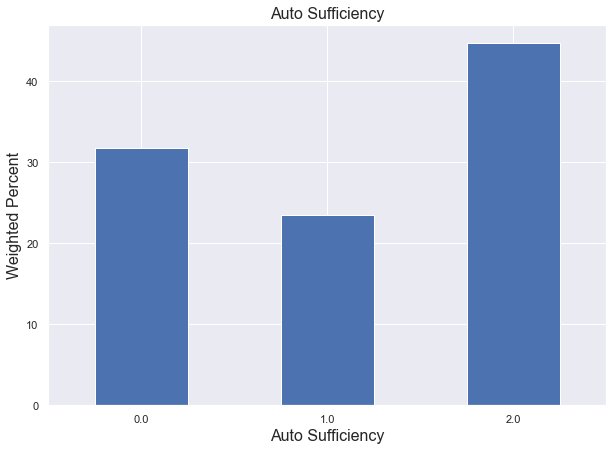

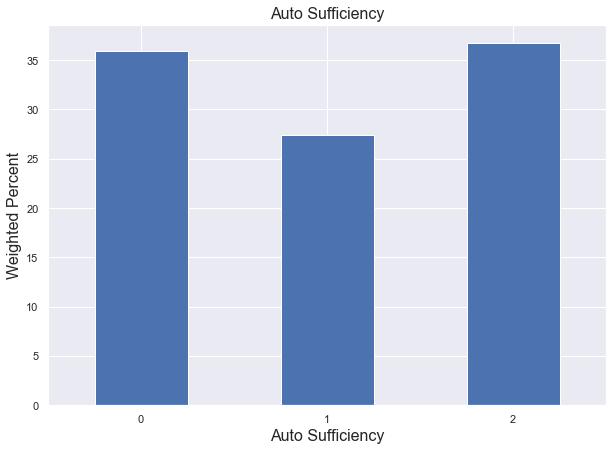

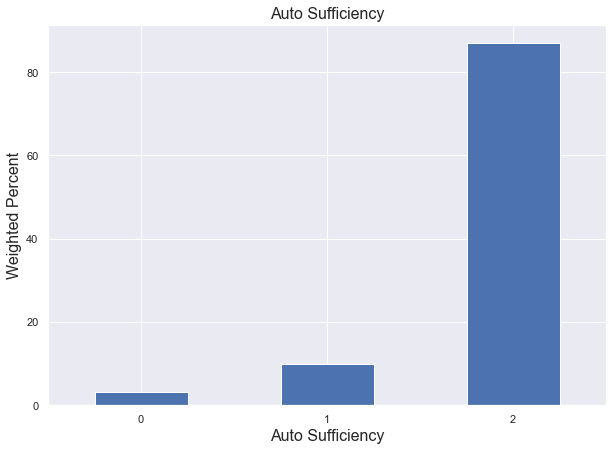

In [56]:
make_percentage_bar_plot(
    variable='auto_suff',
    title="Auto Sufficiency",
    xlabel="Auto Sufficiency",
    xlabel_rotation=0)

make_percentage_bar_plot_cta(
    variable='auto_suff',
    title="Auto Sufficiency",
    xlabel="Auto Sufficiency",
    xlabel_rotation=0)

make_percentage_bar_plot_metra(
    variable='auto_suff',
    title="Auto Sufficiency",
    xlabel="Auto Sufficiency",
    xlabel_rotation=0)

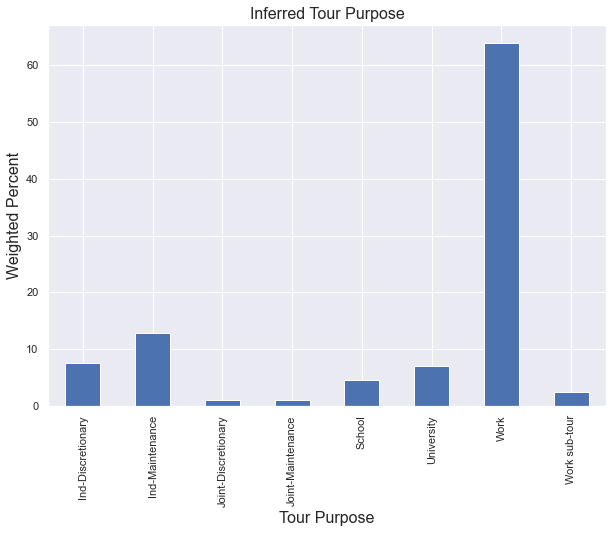

In [57]:
make_percentage_bar_plot(
    variable='TOUR_PURPOSE',
    title="Inferred Tour Purpose",
    xlabel="Tour Purpose",
    xlabel_rotation=90)


In [58]:
obs_df['TOUR_MODE'] = obs_df.apply(lambda row: determine_tour_mode(row), axis=1)
access_df = obs_df.groupby(['TOUR_MODE'])['linked_weight_scaled'].agg(sum).sort_index(level='TOUR_MODE').to_frame()
access_df['Percent'] = access_df['linked_weight_scaled'] / access_df['linked_weight_scaled'].sum() * 100



print(access_df)

obs_df.groupby(['TOUR_MODE','study'])['linked_weight_scaled'].agg(sum).sort_index(level='TOUR_MODE')

           linked_weight_scaled  Percent
TOUR_MODE                               
KNR                   93445.676    7.197
PNR                  194779.026   15.001
TNR                   15413.183    1.187
Walk                 994764.692   76.615


TOUR_MODE  study
KNR        cta      48433.338
           metra    42076.022
           pace      2936.316
PNR        cta      42102.498
           metra   147306.849
           pace      5369.679
TNR        cta      11025.464
           metra     4387.719
Walk       cta     882517.843
           metra    73196.531
           pace     39050.318
Name: linked_weight_scaled, dtype: float64

## Summary tables

### Boardings by line

In [59]:
obs_df['metra_route'] = obs_df['Train_Line']
obs_df['pace_route'] = obs_df['line_name']

metra_route_lookup = {
    1:'Electric, South Chicago',
    4:'Electric, Blue Island ',
    5:'Electric, Main Line',
    6:'Rock Island',
    8:'SouthWest Service',
    9:'Heritage Corridor',
    10:'BNSF',
    11:'Union Pacific West',
    12:'Milwaukee West',
    13:'Union Pacific North West',
    15:'Milwaukee North',
    16:'North Central Service',
    17:'Union Pacific North'}

obs_df.replace({"metra_route": metra_route_lookup}, inplace = True)

obs_df['route'] = obs_df.route_id.combine_first(obs_df.metra_route)
obs_df['route'] = obs_df.route.combine_first(obs_df.pace_route)

obs_df.route.value_counts()

BNSF                              21902
Union Pacific North West          14224
Rock Island                       13350
Red Line                          13147
Union Pacific West                12396
                                  ...  
CENTRAL BOLINGBROOK-LISLE             1
UNIVERSITY PARK - PARK FOREST         1
NORTH STATE - SPRING HILL MALL        1
TOYOTA PARK-EAST LOOP EXP             1
EAST JOLIET                           1
Name: route, Length: 354, dtype: int64

In [60]:
mode_df = obs_df.groupby(['TOUR_MODE'])['linked_weight_scaled'].agg(sum).sort_index(level='TOUR_MODE').to_frame()
mode_df['Percent'] = mode_df['linked_weight_scaled'] / mode_df['linked_weight_scaled'].sum() * 100
display(HTML(mode_df.to_html()))

,linked_weight_scaled,Percent
TOUR_MODE,,
KNR,93445.676,7.197
PNR,194779.026,15.001
TNR,15413.183,1.187
Walk,994764.692,76.615


### Linked trips by transit mode + tour purpose

In [61]:
mode_purpose_ct = pd.crosstab(obs_df['TOUR_PURPOSE'], obs_df['TOUR_MODE'], values=obs_df['linked_weight_scaled'], aggfunc=sum, margins=True)
mode_purpose_ct = add_percentage_to_crosstab(mode_purpose_ct)
mode_purpose_ct.fillna(0, inplace=True)
mode_purpose_ct.applymap(lambda x: round(x,2))


TOUR_MODE,KNR,PNR,TNR,Walk,All,Percent
TOUR_PURPOSE,,,,,,
Ind-Discretionary,4604.550,3116.850,1311.260,86726.810,95759.470,7.380
Ind-Maintenance,7124.870,5418.820,2161.370,136529.290,151234.350,11.650
Joint-Discretionary,865.500,354.010,257.340,10315.380,11792.230,0.910
Joint-Maintenance,718.100,195.900,124.360,10254.780,11293.140,0.870
School,5887.900,1015.420,342.910,45456.870,52703.090,4.060
University,5787.240,5023.210,788.010,75315.680,86914.140,6.690
Work,66437.920,174513.580,9765.060,606591.550,857308.120,66.030
Work sub-tour,2019.600,5141.240,662.880,23574.330,31398.050,2.420
All,93445.680,194779.030,15413.180,994764.690,1298402.580,100.000


### Linked trips by tour purpose, auto sufficiency, and access mode

In [62]:
purpose_suff_access_ct = pd.crosstab(obs_df['TOUR_PURPOSE'], [obs_df['auto_suff'], obs_df['access_mode']], values=obs_df['linked_weight_scaled'], aggfunc=sum, margins=True)
purpose_suff_access_ct = add_percentage_to_crosstab(purpose_suff_access_ct)
purpose_suff_access_ct.fillna(0, inplace=True)
purpose_suff_access_ct.applymap(lambda x: round(x,2))

auto_suff                0.0                                    1.0           \
access_mode              KNR      PNR      TNR       Walk       KNR      PNR   
TOUR_PURPOSE                                                                   
Ind-Discretionary   1038.170   37.030   94.980  35331.550   985.260  224.010   
Ind-Maintenance     1297.740  480.030  277.770  70224.410   886.210  205.230   
Joint-Discretionary  169.850    0.000   14.180   3260.540   135.690    3.940   
Joint-Maintenance     59.450    1.250   18.930   3991.030    71.760    8.300   
School               197.430    2.680   73.440   8104.850   934.200   77.420   
University           530.030   61.960   56.200  30616.570   809.430  415.160   
Work                4675.670 1911.990 1402.710 206716.040  9651.010 8510.610   
Work sub-tour        125.600   89.180   53.260   7926.940   284.710  446.040   
All                 8093.940 2584.120 1991.470 366171.940 13758.280 9890.700   
Percent                0.620    0.200    0.150     28.200     1.060    0.760   

auto_suff                                     2.0                     \
access_mode              TNR       Walk       KNR       PNR      TNR   
TOUR_PURPOSE                                                           
Ind-Discretionary    162.590  19715.580  1080.580  2136.820  371.030   
Ind-Maintenance      225.030  21863.260  2887.280  2610.680  588.440   
Joint-Discretionary   16.440   3683.830   314.340   259.080   58.560   
Joint-Maintenance     14.850   2697.780   357.850   111.360   22.240   
School                 1.550  13246.010  3179.110   706.200  164.960   
University            77.710  16848.800  2528.070  2689.900  256.500   
Work                1323.840 185270.870 26222.840 82785.740 2996.940   
Work sub-tour        207.480   5496.260   852.590  2595.400  286.660   
All                 2029.490 268822.380 37422.660 93895.160 4745.330   
Percent                0.160     20.700     2.880     7.230    0.370   

auto_suff                              All Percent  
access_mode               Walk                      
TOUR_PURPOSE                                        
Ind-Discretionary    34581.880   95759.470   7.380  
Ind-Maintenance      49688.260  151234.350  11.650  
Joint-Discretionary   3875.770   11792.230   0.910  
Joint-Maintenance     3938.340   11293.140   0.870  
School               26015.250   52703.090   4.060  
University           32023.820   86914.140   6.690  
Work                325839.850  857308.120  66.030  
Work sub-tour        13033.930   31398.050   2.420  
All                 488997.110 1298402.580 100.000  
Percent                 37.660     100.000   0.000

## Write coded output

In [63]:
obs_df.to_csv(os.path.join(output_path, 'processed_obs.csv'))

In [64]:
obs_df.groupby('study').sum('unlinked_weight_scaled')

,hh_employed,hh_veh,hh_size,unlinked_weight,linked_weight,auto_suff,unlinked_weight_scaled,total_transfers_updated,linked_weight_scaled,Mode_Access_Code,Mode_Egress_Code,Rail_Line,Train_Line,Transfer_To,Origin_Code,Destination_Code,ON_Weight,OFF_Weight,Gender_Code,Age_Code,Race_single_field,HH_People,HH_Children,HH_Employed,HH_Income_Code,autosuff,num_transfers,surveyed_hour,sampno,perno,placeno,transitno,latitude,longitude,imputed,access,egress,transfers,tpurp,person_weight,trip_rate_factor,trip_weight,hhsize,hhveh,workers,schol,opurp,arr_hour,uWTP,expuWTP,probWTP,randn,uWST,expuWST,probWST,uFJT,expuFJT,probFJT
study,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cta,119490.000,80443.000,179588.000,1339652.681,1001704.188,80518.000,1331286.000,34348.000,984079.143,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-49840.478,52332.094,24362.861,34966.708,-311399.110,5845.936,3839.490,-168665.193,7728.409,6679.815
metra,0.000,0.000,0.000,260000.000,259218.483,207774.000,267772.000,0.000,266967.121,322204.000,274970.000,1233038.000,1226970.000,0.000,156384.000,281880.000,260000.000,260095.161,172482.000,234870.000,227446.000,304024.000,77420.000,169252.000,973620.000,207774.000,716.000,755326.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,124023.112,483735.599,80904.638,56524.781,-417282.920,5598.624,4461.650,-366776.006,4559.943,4362.695
pace,0.000,0.000,2179.000,309005.344,142275.831,1104.000,102852.000,0.000,47356.313,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,56596715575.000,1246.000,2591.000,1628.000,34097.082,-71491.634,1035.000,0.000,0.000,934.000,4744.000,120014.426,906.305,142275.831,2179.000,1160.000,1197.000,137.000,4794.000,10363.000,-210.903,1250.909,359.727,410.485,-3547.190,52.757,36.499,-2067.531,75.963,67.542
